# ADVANCED CUSTOMER SEGMENTATION

In this project, we will use an advanced library (Kmodes) developed by the Massachusetts Institute of Technology (MIT).
Since our data is complex, we cannot use K-Means here.

In [1]:
import numpy as np 
import pandas as pd


In [3]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# The kmodes library is not included in the standard distribution, you may need to install it.
# It is an advanced library developed by the Massachusetts Institute of Technology (MIT).
# Details are available at https://anaconda.org/conda-forge/kmodes
# You can install it on Anaconda with the command # conda install -c conda-forge kmodes.
from kmodes.kprototypes import KPrototypes  




In [4]:
# You can download dataset from: https://www.kaggle.com/khalidnasereddin/retail-dataset-analysis?select=segmentation-data.csv#
df = pd.read_csv("segmentation-data.csv")
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
# Let's look the dataset if we have any null?
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

We have no null data, ok..

In [6]:
# Income ve Age Data Normalization
# Before Scaling/Normalization we keep our normal values in temp variables..
df_temp = df[['ID','Age', 'Income']]
df_temp


,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


### Scaling process..

In [7]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])


In [8]:
# Since ID is not used in analysis, Drop ID before analysis..
df = df.drop(['ID'], axis=1)

In [9]:
# Convert Age and Income into float..
mark_array= df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)


In [10]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [12]:
# We are building our model...

kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])


print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 556, ncost: 191.538793125921
Run: 1, iteration: 2/20, moves: 159, ncost: 190.56420340943973
Run: 1, iteration: 3/20, moves: 91, ncost: 190.3109547222787
Run: 1, iteration: 4/20, moves: 27, ncost: 190.28348195089043
Run: 1, iteration: 5/20, moves: 12, ncost: 190.27552126672862
Run: 1, iteration: 6/20, moves: 3, ncost: 190.27385983968003
Run: 1, iteration: 7/20, moves: 4, ncost: 190.27232677880602
Run: 1, iteration: 8/20, moves: 0, ncost: 190.27232677880602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 586, ncost: 176.1360010104051
Run: 2, iteration: 2/20, moves: 231, ncost: 173.60550604149168
Run: 2, iteration: 3/20, moves: 101, ncost: 167.7889160125183
Run: 2, iteration: 4/20, moves: 42, ncost: 167.65338291423518
Run: 2, iteration: 5/20

10

In [13]:
cluster_col=[]
for c in clusters:
    cluster_col.append(c)

df['cluster']=cluster_col

# Put original columns from temp to df:
df[['ID','Age', 'Income']] = df_temp


In [14]:
# After clustering, you can now easily get lists of your customers for each cluster or segment:
df[df['cluster'] == 9].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
18,1,1,44,2,261952,2,2,9,100000019
27,1,1,42,2,163025,1,1,9,100000028
44,1,1,58,2,142335,0,1,9,100000045
80,1,1,44,2,159246,1,2,9,100000081
83,1,1,58,2,100210,0,0,9,100000084
96,1,1,61,2,135070,1,1,9,100000097
121,1,1,41,2,166933,2,2,9,100000122
147,1,1,51,2,127825,1,0,9,100000148
175,1,1,53,2,211229,2,0,9,100000176
186,1,1,74,3,214364,2,1,9,100000187


No handles with labels found to put in legend.


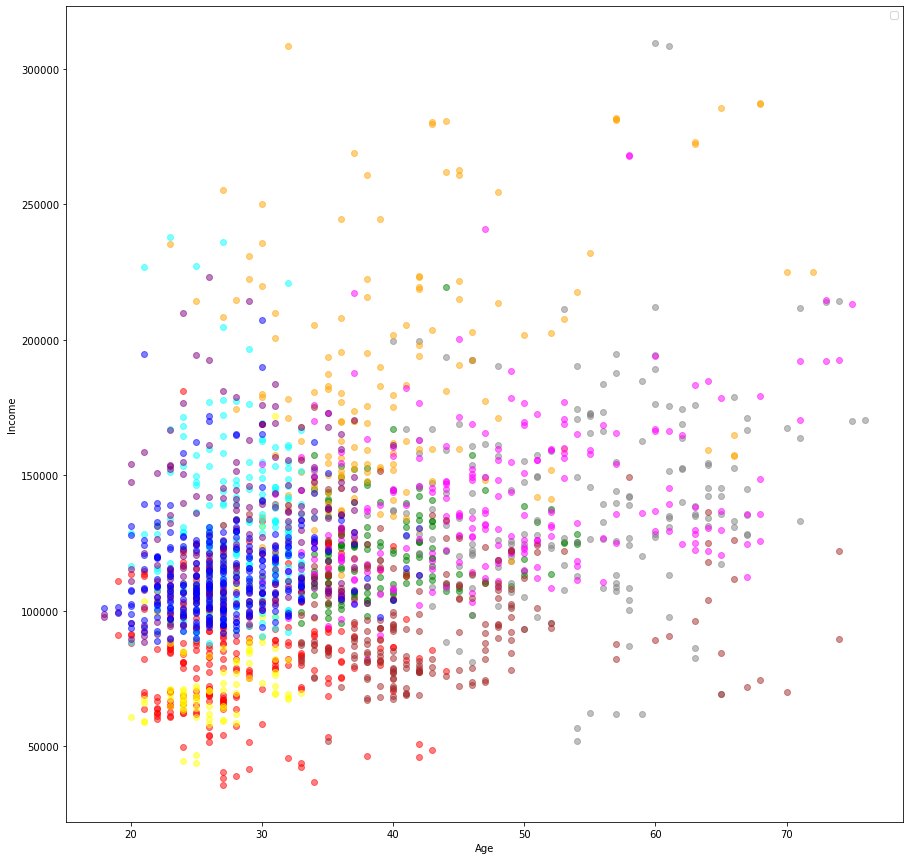

In [15]:
colors = ['green', 'red', 'gray', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'purple', 'blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
    dftemp = df[df.cluster==i]
    plt.scatter(dftemp.Age, dftemp['Income'], color=col, alpha=0.5)
    
plt.legend()
plt.show()
    

Change cluster size (using values both lower and greater than 10) and run the program again and see if you can get a better segmentation...

In [15]:
# We are building our next model, Clsuter = 8

kproto = KPrototypes(n_clusters=8, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])


print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 730, ncost: 182.57807573301974
Run: 1, iteration: 2/20, moves: 103, ncost: 181.89914142178327
Run: 1, iteration: 3/20, moves: 29, ncost: 181.8635070247712
Run: 1, iteration: 4/20, moves: 15, ncost: 181.8410674615664
Run: 1, iteration: 5/20, moves: 12, ncost: 181.8267177899457
Run: 1, iteration: 6/20, moves: 14, ncost: 181.8039034486589
Run: 1, iteration: 7/20, moves: 12, ncost: 181.7910354893126
Run: 1, iteration: 8/20, moves: 12, ncost: 181.7793991314
Run: 1, iteration: 9/20, moves: 12, ncost: 181.76806739143132
Run: 1, iteration: 10/20, moves: 7, ncost: 181.766349691669
Run: 1, iteration: 11/20, moves: 2, ncost: 181.76620134774788
Run: 1, iteration: 12/20, moves: 0, ncost: 181.76620134774788
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, move

8

In [16]:
cluster_col=[]
for c in clusters:
    cluster_col.append(c)

df['cluster']=cluster_col

# Put original columns from temp to df:
df[['ID','Age', 'Income']] = df_temp


In [17]:
# After clustering, you can now easily get lists of your customers for each cluster or segment:
df[df['cluster'] == 6].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
0,0,0,67,2,124670,1,2,6,100000001
8,0,1,61,2,151591,0,0,6,100000009
27,1,1,42,2,163025,1,1,6,100000028
29,0,0,63,2,175882,1,0,6,100000030
44,1,1,58,2,142335,0,1,6,100000045
54,0,0,57,2,135830,1,1,6,100000055
62,0,0,61,2,166410,2,1,6,100000063
75,0,0,66,2,157299,2,2,6,100000076
80,1,1,44,2,159246,1,2,6,100000081
95,0,0,58,2,268340,1,1,6,100000096


No handles with labels found to put in legend.


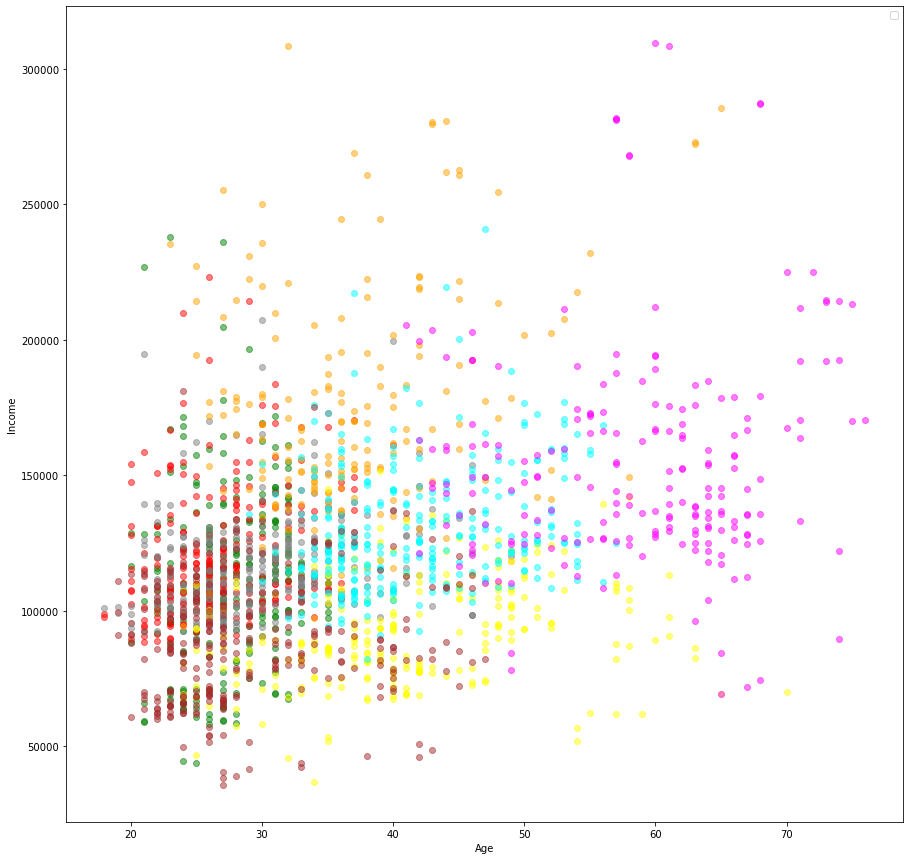

In [18]:
colors = ['green', 'red', 'gray', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'purple', 'blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
    dftemp = df[df.cluster==i]
    plt.scatter(dftemp.Age, dftemp['Income'], color=col, alpha=0.5)
    
plt.legend()
plt.show()
    

In [20]:
# We are  building our next model, Clsuter = 12

kproto = KPrototypes(n_clusters=12, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])


print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 700, ncost: 155.43791240754427
Run: 1, iteration: 2/20, moves: 244, ncost: 150.32245530324732
Run: 1, iteration: 3/20, moves: 70, ncost: 149.86318387947537
Run: 1, iteration: 4/20, moves: 82, ncost: 143.76912437325478
Run: 1, iteration: 5/20, moves: 121, ncost: 138.28467389617188
Run: 1, iteration: 6/20, moves: 146, ncost: 137.4566975760002
Run: 1, iteration: 7/20, moves: 9, ncost: 137.45171824261365
Run: 1, iteration: 8/20, moves: 1, ncost: 137.45167155329284
Run: 1, iteration: 9/20, moves: 0, ncost: 137.45167155329284
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 678, ncost: 160.34611239811005
Run: 2, iteration: 2/20, moves: 256, ncost: 157.46569244856934
Run: 2, iteration: 3/20, moves: 61, ncost: 157.31066696520188
Run: 2, iteration:

12

In [21]:
cluster_col=[]
for c in clusters:
    cluster_col.append(c)

df['cluster']=cluster_col

# Put original columns from temp to df:
df[['ID','Age', 'Income']] = df_temp


In [22]:
# After clustering, you can now easily get lists of your customers for each cluster or segment:
df[df['cluster'] == 11].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
8,0,1,61,2,151591,0,0,11,100000009
13,0,0,60,2,89374,0,0,11,100000014
33,0,0,57,2,87605,0,0,11,100000034
73,1,1,41,2,135959,0,0,11,100000074
83,1,1,58,2,100210,0,0,11,100000084
139,1,1,44,2,108251,0,0,11,100000140
147,1,1,51,2,127825,1,0,11,100000148
157,0,1,45,2,72215,0,0,11,100000158
176,0,1,42,2,121307,1,0,11,100000177
187,0,0,68,2,74525,0,0,11,100000188


No handles with labels found to put in legend.


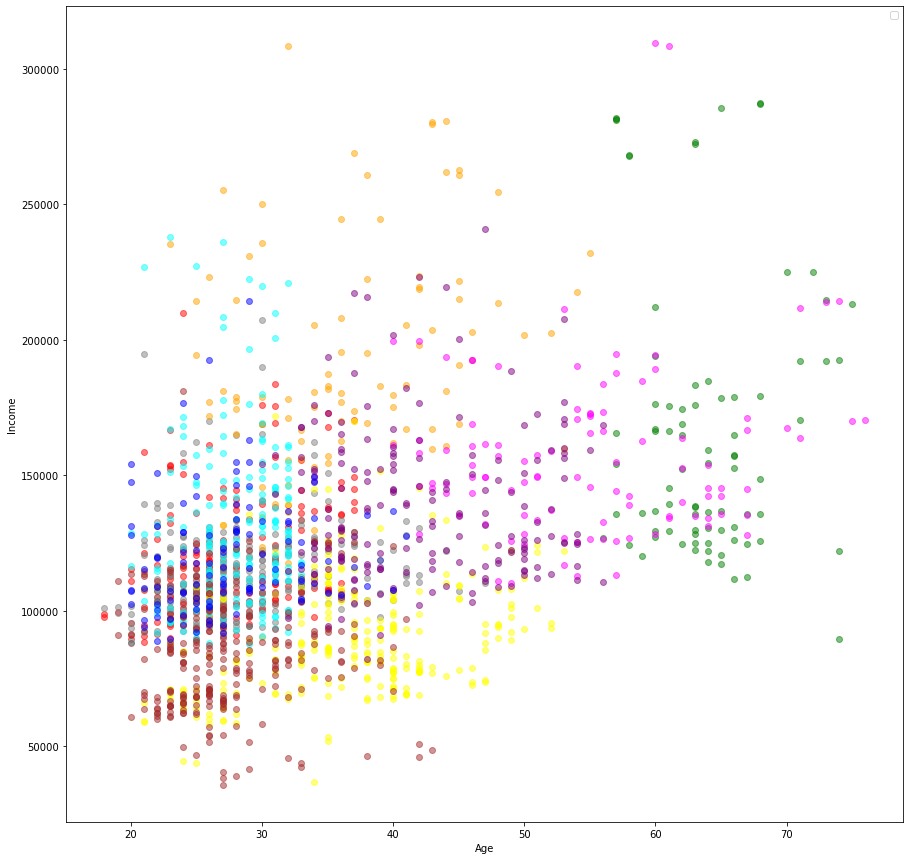

In [23]:
colors = ['green', 'red', 'gray', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'purple', 'blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
    dftemp = df[df.cluster==i]
    plt.scatter(dftemp.Age, dftemp['Income'], color=col, alpha=0.5)
    
plt.legend()
plt.show()